In [1]:
import pandas as pd
from pathlib import Path

path = "../data/raw/estab_sep/"
files = Path(path).rglob('*.csv')

In [2]:
from pandas.core.frame import DataFrame

estab_sep_dataframes: list[DataFrame] = [pd.read_csv(filepath, sep=";", low_memory=False) for filepath in files]

In [4]:
len(estab_sep_dataframes)

10

In [10]:
from collections import Counter
import unicodedata

all_columns = [col for df in estab_sep_dataframes for col in df.columns]

column_counts = Counter(all_columns)

print("Column name occurrences:")
for col, count in column_counts.items():
    print(f"{col}: {count}")
    # print(f"  - Length: {len(col)}")
    #print(f"  - Unicode name: {[unicodedata.name(c) for c in col]}")
    # print(f"  - Repr: {repr(col)}")


Column name occurrences:
agno: 10
rbd: 10
dgv_rbd: 10
nom_rbd: 10
cod_reg_rbd: 10
cod_pro_rbd: 10
cod_com_rbd: 10
nom_com_rbd: 10
cod_depe: 10
cod_depe2: 10
rural_rbd: 10
clasificacion_sep: 10
n_prio: 10
n_ben: 10
cod_deprov_rbd: 9
nom_deprov_rbd: 9
convenio_sep: 9
año_ingreso_sep: 9
estado_estab: 8
ee_gratuito: 8
n_prio_ben: 8
n_pref: 8
n_pref_ben: 8


In [ ]:
columns_to_keep = ['agno', 'rbd', 'clasificacion_sep', 'convenio_sep', 'n_prio', 'n_ben', 'n_prio_ben', 'n_pref', 'n_pref_ben']

In [6]:
for df in estab_sep_dataframes:
    df.rename(columns={column:column.casefold().strip() for column in df.columns}, inplace=True)
    
for df in estab_sep_dataframes:
    df.rename(columns={"\ufeffagno":"agno"}, inplace=True)


In [8]:
concat_estab_sep_df = pd.concat(estab_sep_dataframes, axis=0, ignore_index=True)

In [ ]:
concat_estab_sep_df

In [11]:
import geopandas as gpd

gdf = gpd.read_file('../data/raw/comunas/comunas.shp')

In [14]:
%pip -u install folium matplotlib mapclassify

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 2.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


<Axes: >

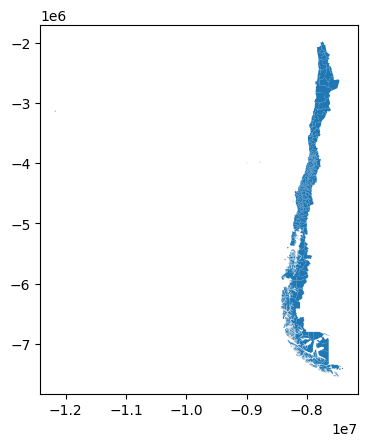

In [16]:
gdf.plot()